# Finance Data Project

In this data project we will focus on exploratory data analysis of stock prices of global banks and see how they progressed throughout the [financial crisis] all the way to early 2016. 

## Getting the Data thorough Pandas DataReader


*Pandas datareader allows us to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html)*

### The Imports

In [4]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks from Yahoo finance:

* Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

    
### Bank of America
BAC = data.DataReader("BAC", 'yahoo', start, end)


In [5]:
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)

Creating a list of the ticker symbols (as strings) in alphabetical order

In [10]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

Using pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list.

In [9]:
#Bank Of America
BAC = data.DataReader("BAC",'yahoo', start, end)

#Citigroup
C = data.DataReader("C",'yahoo', start, end)

#Goldman Sachs
GS = data.DataReader("GS",'yahoo', start, end)

#JP Morgan
JPM = data.DataReader("JPM",'yahoo', start, end)

#Morgan Stanley
MS = data.DataReader("MS",'yahoo', start, end)

#Wells Fargo
WFC = data.DataReader("WFC",'yahoo', start, end)

In [12]:
bank_stocks = pd.concat([BAC,C, GS, JPM, MS, WFC],axis=1, keys = tickers)

In [13]:
bank_stocks.head()

BAC                                                          \
                 High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0  33.584045   
2006-01-04  47.240002  46.450001  47.000000  46.580002  17757900.0  33.227398   
2006-01-05  46.830002  46.320000  46.580002  46.639999  14970700.0  33.270199   
2006-01-06  46.910000  46.349998  46.799999  46.570000  12599800.0  33.220272   
2006-01-09  46.970001  46.360001  46.720001  46.599998  15619400.0  33.241665   

                     C                                      ...         MS  \
                  High         Low        Open       Close  ...       Open   
Date                                                        ...              
2006-01-03  493.799988  481.100006  490.000000  492.899994  ...  57.169998   
2006-01-04  491.000000  483.500000  488.600006  483.799988  ...  58.700001   
2006-01-05  487.799988  484.000000  484.399994  486.200012  ...  58.549999   
2006-01-06  489.000000  482.000000  488.799988  486.200012  ...  58.770000   
2006-01-09  487.399994  483.000000  486.000000  483.899994  ...  58.630001   

                                                   WFC                        \
                Close     Volume  Adj Close       High        Low       Open   
Date                                                                           
2006-01-03  58.310001  5377000.0  35.558964  31.975000  31.195000  31.600000   
2006-01-04  58.349998  7977800.0  35.583366  31.820000  31.365000  31.799999   
2006-01-05  58.509998  5778000.0  35.680920  31.555000  31.309999  31.500000   
2006-01-06  58.570000  6889800.0  35.717506  31.775000  31.385000  31.580000   
2006-01-09  59.189999  4144500.0  36.095619  31.825001  31.555000  31.674999   

                                              
                Close      Volume  Adj Close  
Date                                          
2006-01-03  31.900000  11016400.0  20.242819  
2006-01-04  31.530001  10870000.0  20.008028  
2006-01-05  31.495001  10158000.0  19.985825  
2006-01-06  31.680000   8403800.0  20.103226  
2006-01-09  31.674999   5619600.0  20.100040  

[5 rows x 36 columns]

** Setting the column name levels**

In [14]:
bank_stocks.columns.names = ['Bank Ticker', 'Stock Info']

In [16]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   33.584045  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   33.227398  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   33.270199  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   33.220272  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   33.241665  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  35.558964  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  35.583366  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  35.680920  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  35.717506  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  36.095619  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.242819  
2006-01-04   31.799999  31.530001  10870000.0  20.008028  
2006-01-05   31.500000  31.495001  10158000.0  19.985825  
2006-01-06   31.580000  31.680000   8403800.0  20.103226  
2006-01-09   31.674999  31.674999   5619600.0  20.100040  

[5 rows x 36 columns]

# EDA


** What is the max Close price for each bank's stock throughout the time period?**

In [18]:
bank_stocks.xs(key='Close', axis=1, level= 'Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [19]:
returns = pd.DataFrame()

Using pandas pct_change() method on the Close column to create a column representing this return value.

In [20]:
for tick in tickers:
    returns[tick+' Return']= bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


** Creating a pairplot using seaborn of the returns dataframe to find the relationship between bank returns. 
Citi Bank stock stands out from the rest!

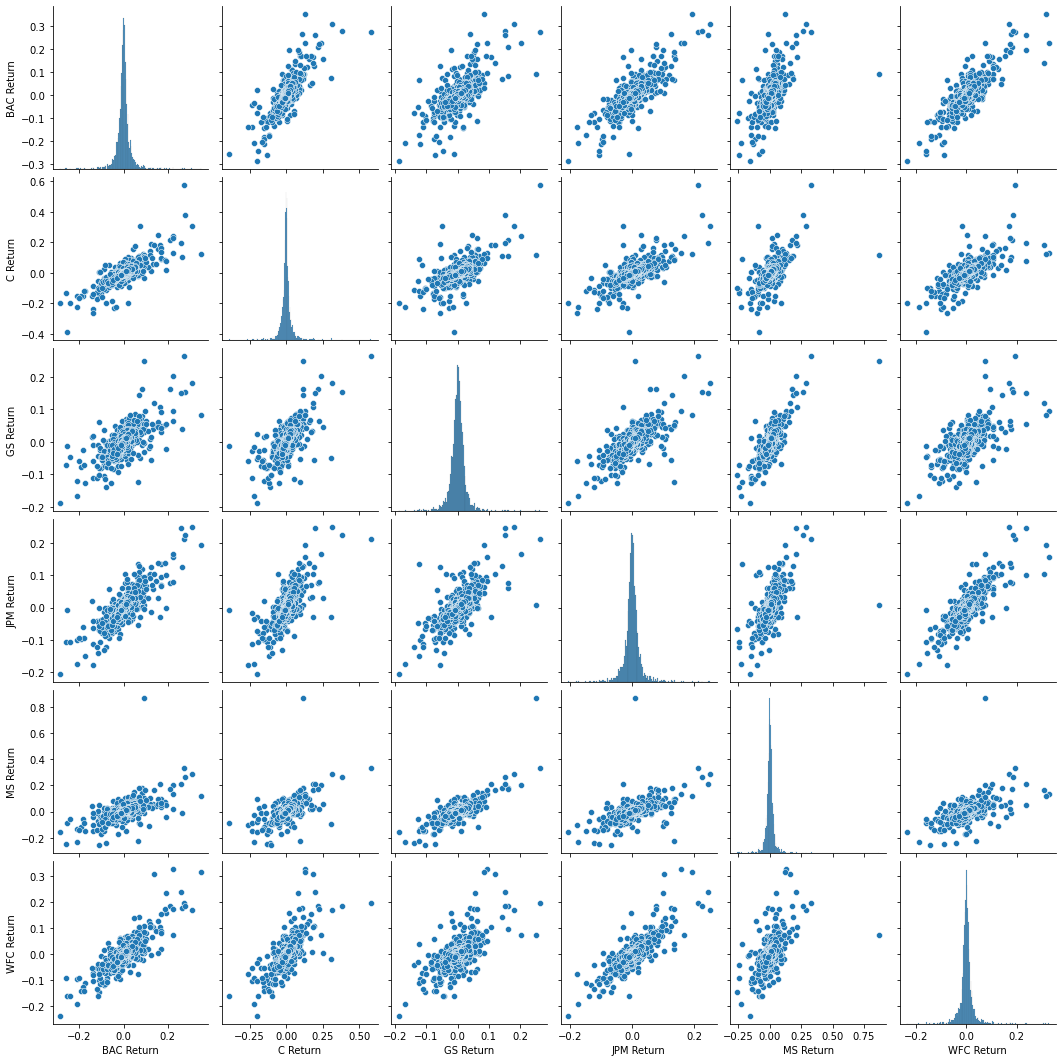

In [22]:
#returns[1:]

sns.pairplot(data= returns[1:])


Background on [Citigroup's Stock Crash available here.](https://en.wikipedia.org/wiki/Citigroup#November_2008.2C_Collapse_.26_US_Government_Intervention_.28part_of_the_Global_Financial_Crisis.29) 

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [61]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


In [25]:
# Worst Drop (4 of them on Inauguration day)
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [62]:
# Best Single Day Gain
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

Looking at the standard deviation of the returns, which will give us the stocks with the most risks involved

In [27]:
returns.std()     # Citibank most riskiest over the time period 2006-2016

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

In [30]:
#For the year 2015

returns.loc['2015-01-01': '2015-12-31'].std()     # Most have same risk profiles but MS or BAC

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

Distplot using seaborn of the 2015 returns for Morgan Stanley

C:\Users\ashwa\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MS Return', ylabel='Density'>

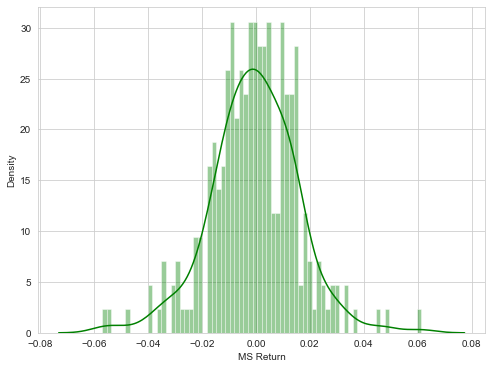

In [36]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,6))

sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'], color='green', bins= 70)

Distplot using seaborn of the 2008 returns for CitiGroup

C:\Users\ashwa\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='C Return', ylabel='Density'>

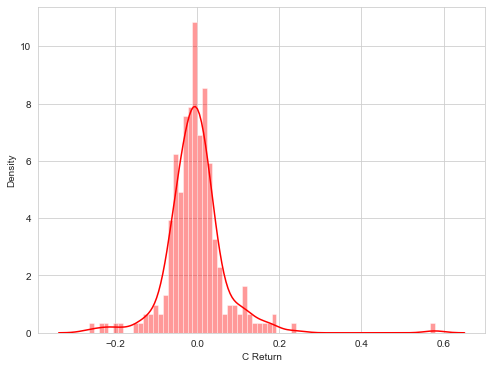

In [37]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,6))

sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'], color='red', bins= 70)

In [41]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   33.584045  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   33.227398  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   33.270199  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   33.220272  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   33.241665  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  35.558964  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  35.583366  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  35.680920  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  35.717506  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  36.095619  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.242819  
2006-01-04   31.799999  31.530001  10870000.0  20.008028  
2006-01-05   31.500000  31.495001  10158000.0  19.985825  
2006-01-06   31.580000  31.680000   8403800.0  20.103226  
2006-01-09   31.674999  31.674999   5619600.0  20.100040  

[5 rows x 36 columns]

____
# More Visualization


### Imports Plotly and cufflinks

In [39]:
import plotly
import cufflinks as cf
cf.go_offline()

Line plot showing Close price for each bank for the entire index of time.

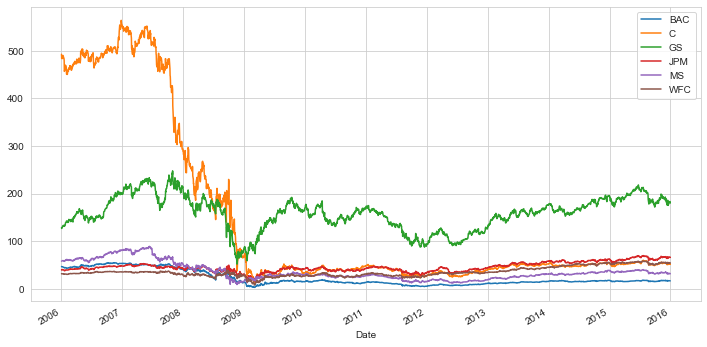

In [42]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,6), label= tick)

plt.legend()

<AxesSubplot:xlabel='Date'>

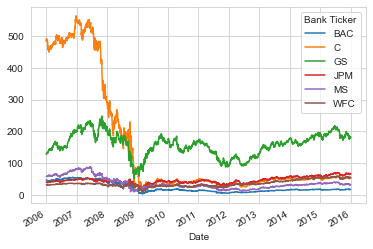

In [43]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').plot()

In [44]:
# plotly
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

Rolling30 day average against the Close Price for each bank's stock for the year 2008

In [45]:
BAC.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,47.180000,46.150002,46.919998,47.080002,16296700.0,33.584045
2006-01-04,47.240002,46.450001,47.000000,46.580002,17757900.0,33.227398
2006-01-05,46.830002,46.320000,46.580002,46.639999,14970700.0,33.270199
2006-01-06,46.910000,46.349998,46.799999,46.570000,12599800.0,33.220272
2006-01-09,46.970001,46.360001,46.720001,46.599998,15619400.0,33.241665


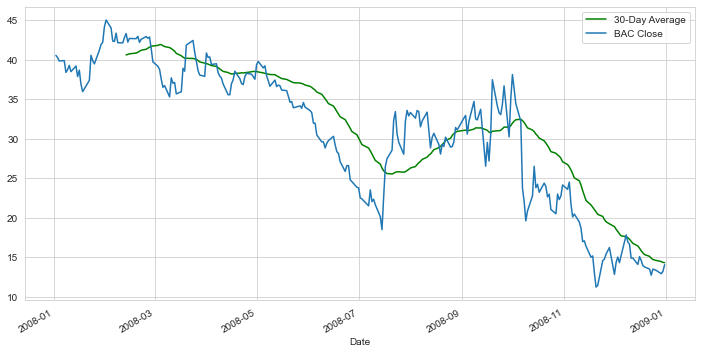

In [48]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
BAC['Close'].loc['2008-01-01': '2008-12-31'].rolling(window=30).mean().plot(label='30-Day Average', color='green')
BAC['Close'].loc['2008-01-01': '2008-12-31'].plot(label='BAC Close')
plt.legend()

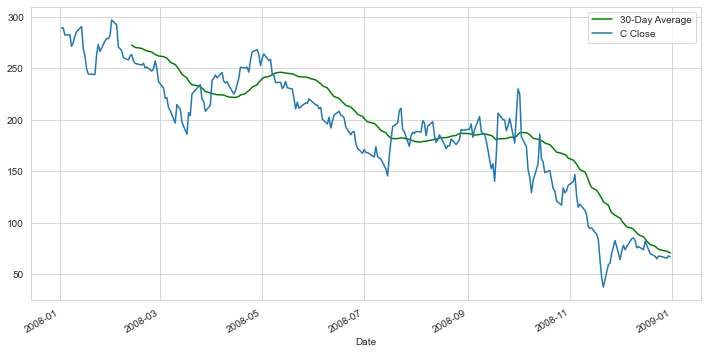

In [49]:
#Citigroup

sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
C['Close'].loc['2008-01-01': '2008-12-31'].rolling(window=30).mean().plot(label='30-Day Average', color='green')
C['Close'].loc['2008-01-01': '2008-12-31'].plot(label='C Close')
plt.legend()

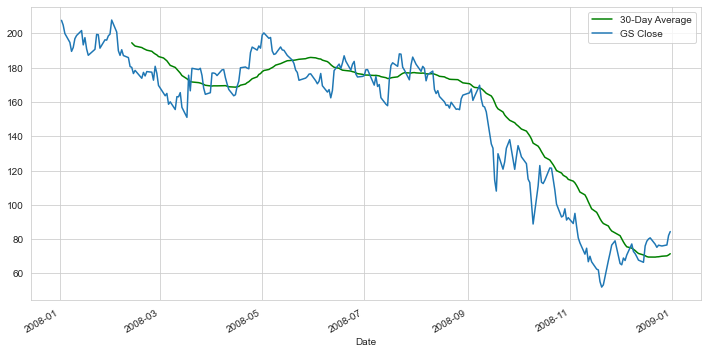

In [51]:
#GS

sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
GS['Close'].loc['2008-01-01': '2008-12-31'].rolling(window=30).mean().plot(label='30-Day Average', color='green')
GS['Close'].loc['2008-01-01': '2008-12-31'].plot(label='GS Close')
plt.legend()

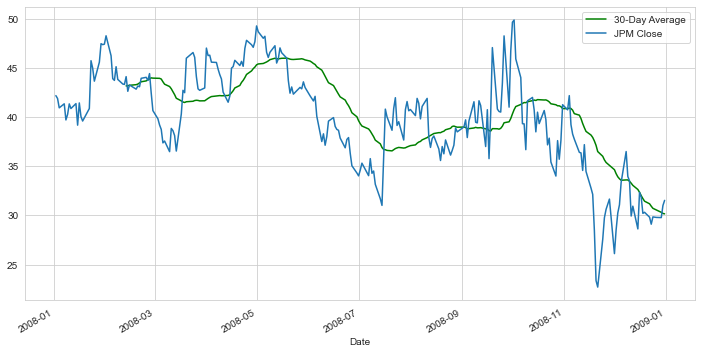

In [52]:
#JP Morgan

sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
JPM['Close'].loc['2008-01-01': '2008-12-31'].rolling(window=30).mean().plot(label='30-Day Average', color='green')
JPM['Close'].loc['2008-01-01': '2008-12-31'].plot(label='JPM Close')
plt.legend()

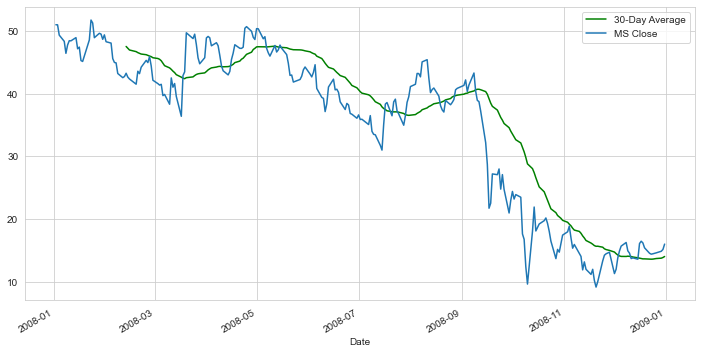

In [53]:
#MS

sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
MS['Close'].loc['2008-01-01': '2008-12-31'].rolling(window=30).mean().plot(label='30-Day Average', color='green')
MS['Close'].loc['2008-01-01': '2008-12-31'].plot(label='MS Close')
plt.legend()

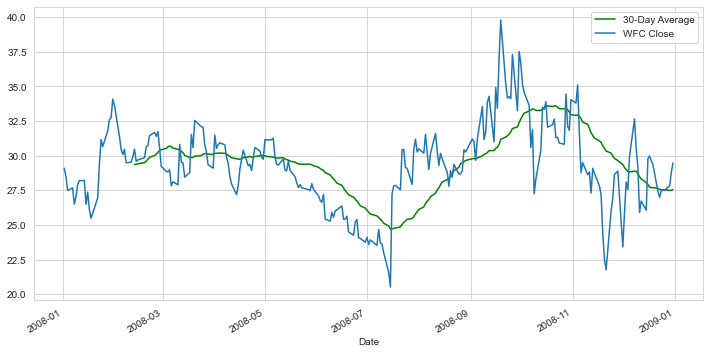

In [54]:
#WFC

sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
WFC['Close'].loc['2008-01-01': '2008-12-31'].rolling(window=30).mean().plot(label='30-Day Average', color='green')
WFC['Close'].loc['2008-01-01': '2008-12-31'].plot(label='WFC Close')
plt.legend()

Heatmap of the correlation between the stocks Close Price

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

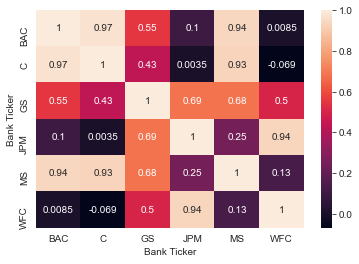

In [55]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1, level='Stock Info').corr(), annot= True)

Using seaborn's clustermap to cluster the correlations together:**

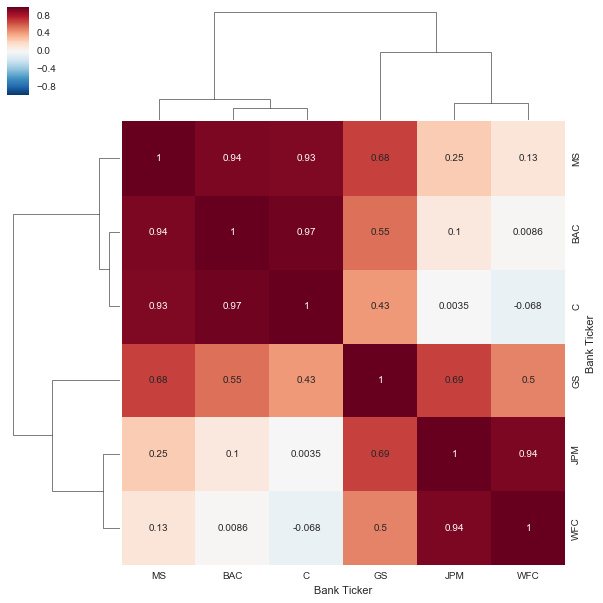

In [26]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [56]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

Using the cufflinks library to create some Technical Analysis plots.

** Using .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [57]:
BAC.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,47.180000,46.150002,46.919998,47.080002,16296700.0,33.584045
2006-01-04,47.240002,46.450001,47.000000,46.580002,17757900.0,33.227398
2006-01-05,46.830002,46.320000,46.580002,46.639999,14970700.0,33.270199
2006-01-06,46.910000,46.349998,46.799999,46.570000,12599800.0,33.220272
2006-01-09,46.970001,46.360001,46.720001,46.599998,15619400.0,33.241665


In [58]:
BAC[['Open','High', 'Low','Close']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

** Using .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [59]:
MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study="sma", periods=[13,21,55], title='Simple Moving Averages')

**Using .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [60]:
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')

# END!